<a href="https://colab.research.google.com/github/kevinpatelco/App_Trends/blob/master/App_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Upload Data Files
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
!ls -al


total 1304
drwxr-xr-x 1 root root   4096 Dec  3 23:42 .
drwxr-xr-x 1 root root   4096 Dec  3 23:41 ..
drwxr-xr-x 1 root root   4096 Nov 29 18:21 .config
-rw-r--r-- 1 root root  90920 Dec  3 23:42 new_free_ios.csv
-rw-r--r-- 1 root root 651097 Dec  3 23:42 new_free_play.csv
-rw-r--r-- 1 root root 572699 Dec  3 23:42 new_paid_play.csv
drwxr-xr-x 2 root root   4096 Nov 29 18:21 sample_data


In [0]:
#Import Libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [0]:
#Configure Datasets

#APP Store Datasets
new_free_ios = pd.read_csv('new_free_ios.csv')
#new_paid_ios = pd.read_csv('new_paid_ios.csv')
# top_free_ios = pd.read_csv('top_free_ios.csv')
# top_paid_ios = pd.read_csv('top_paid_ios.csv')
# top_grossing_ios = pd.read_csv('top_grossing_ios.csv')

# #Play Store Datasets
new_free_play = pd.read_csv('new_free_play.csv')
new_paid_play = pd.read_csv('new_paid_play.csv')
# top_free_play = pd.read_csv('top_free_play.csv')
# top_paid_play = pd.read_csv('top_paid_play.csv')
# top_grossing_play = pd.read_csv('top_grossing_play.csv')


In [0]:
new_free_play.shape

(120, 44)

In [0]:
new_paid_play.shape

(120, 44)

In [0]:
new_free_ios.shape

(200, 12)

# New Free IOS Apps

In [0]:
new_free_ios.head()

,id,appId,description,title,icon,url,developer,developerUrl,developerId,genres,genreIds,released
0,1374403536,NaN,NaN,BitLife - Life Simulator,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://itunes.apple.com/us/app/bitlife-life-s...,"Candywriter, LLC",https://itunes.apple.com/us/developer/candywri...,284954685,"[""Games"",""Simulation"",""Strategy""]","[""6014"",""7015"",""7017""]",2018-09-30
1,1350301428,NaN,NaN,ZEPETO,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://itunes.apple.com/us/app/zepeto/id13503...,SNOW Corporation,https://itunes.apple.com/us/developer/snow-cor...,1342976735,"[""Social Networking"",""Entertainment""]","[""6005"",""6016""]",2018-03-01
2,1437370468,NaN,NaN,Fire Balls 3D,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://itunes.apple.com/us/app/fire-balls-3d/...,Voodoo,https://itunes.apple.com/us/developer/voodoo/i...,714804730,"[""Games"",""Arcade"",""Action""]","[""6014"",""7003"",""7001""]",2018-09-27
3,1252850847,NaN,NaN,NBA 2K Mobile Basketball,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://itunes.apple.com/us/app/nba-2k-mobile-...,2K,https://itunes.apple.com/us/developer/2k/id324...,324563547,"[""Games"",""Sports"",""Sports"",""Action""]","[""6014"",""6004"",""7016"",""7001""]",2018-11-19
4,544007664,NaN,NaN,"YouTube: Watch, Listen, Stream",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://itunes.apple.com/us/app/youtube-watch-...,Google LLC,https://itunes.apple.com/us/developer/google-l...,281956209,"[""Photo & Video"",""Entertainment""]","[""6008"",""6016""]",2012-09-11


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


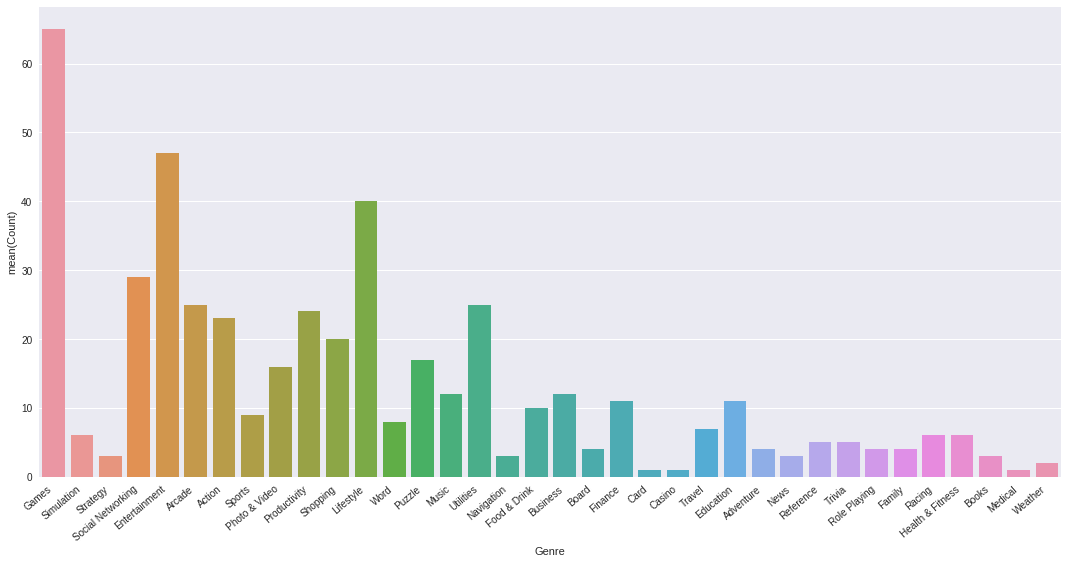

In [0]:
# Let's make a count dictionary
new_free_ios_genre_count = {}

for genre_list in new_free_ios['genres']:
  #convert strig type to list
  #type(genres_list)
  genre_list = json.loads(genre_list)
  for genre in genre_list:
    if genre in new_free_ios_genre_count:
      new_free_ios_genre_count[genre] = new_free_ios_genre_count[genre] + 1
    else: 
      new_free_ios_genre_count[genre] = 1


#convert dictionary to dataframe      
new_free_ios_genre_data_frame = pd.DataFrame(list(new_free_ios_genre_count.items()), columns= ['Genre', 'Count'])
# new_free_ios_genre_data_frame

plt.figure(figsize=(15,8))
ax = sns.barplot(x = "Genre", y = "Count", data = new_free_ios_genre_data_frame)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Here, we created a separate graph for **every time a genre was mentioned** in the top free ios apps category. Now, this does not give us proper insight on what should be our final strategy to be in the top 100 list. Take an example strategy of choosing top 3 genre category, [Games, Entertainment and Lifestyle]. Now, these 3 do not always work together in symphony. 

Let's try by using the **whole list of the genre object** provided in the databse to generate some useful outcome.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


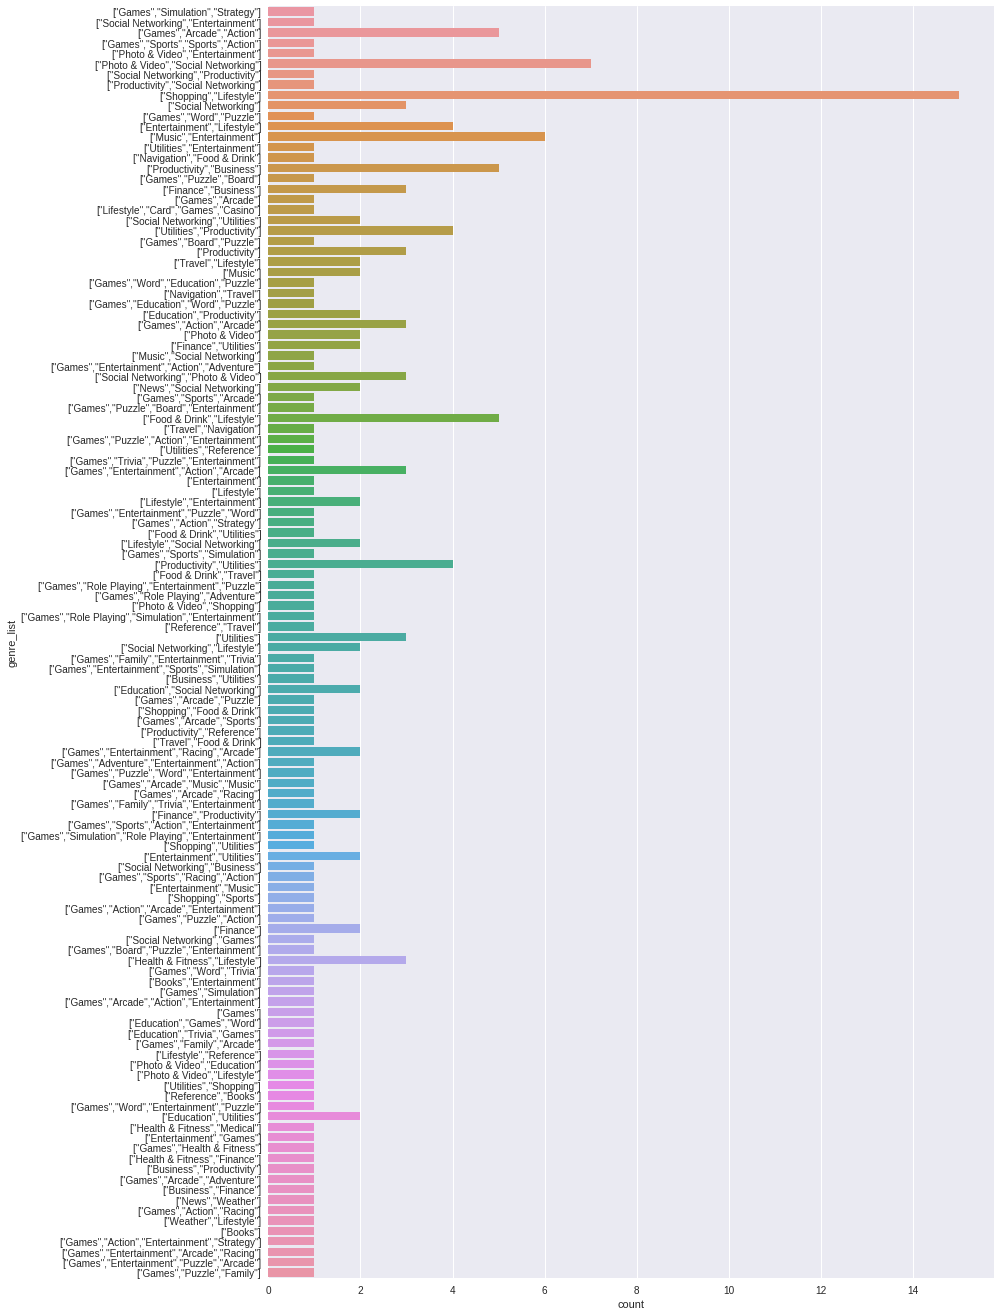

In [0]:
plt.figure(figsize = (13, 23.39))
g = sns.countplot(y = new_free_ios['genres'])
g.set_ylabel('genre_list')
plt.show()

Now, from the plot above, we can see that if you want to be in the top 100 new free ios apps, combination of **shopping and lifestyle** apps is your best bet.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


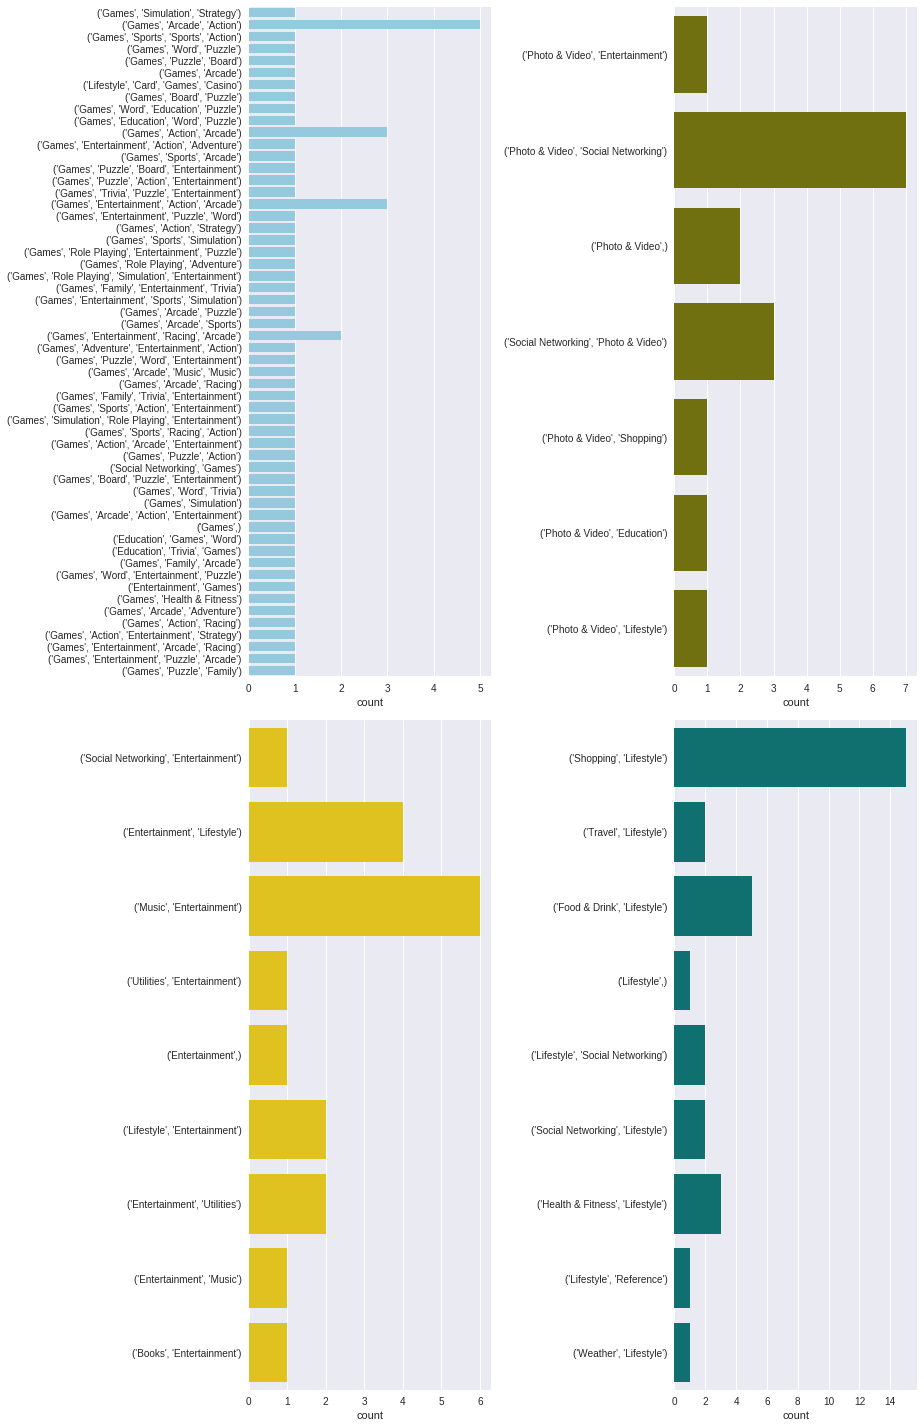

In [0]:
#What if you want to create some specific genre app
new_free_ios_games = []
new_free_ios_photo = []
new_free_ios_entertainment = []
new_free_ios_lifestyle = []

#Add specific genre categories into separate lists
for genres_list in new_free_ios['genres']:
  #convert string type to list
  #type(genres_list)
  genres_list = json.loads(genres_list)
#   print(genres_list[0])
  if "Games" in genres_list:
    new_free_ios_games.append(genres_list)
  elif "Photo & Video" in genres_list:
    new_free_ios_photo.append(genres_list)
  elif "Entertainment" in genres_list:
    new_free_ios_entertainment.append(genres_list)
  elif "Lifestyle" in genres_list:
    new_free_ios_lifestyle.append(genres_list)
  

#Convert Non-hashable list to tuples and then to pandas series (because countplot accepts hashable lists)
new_free_ios_games = pd.Series(tuple(i) for i in new_free_ios_games)
new_free_ios_photo = pd.Series(tuple(i) for i in new_free_ios_photo)
new_free_ios_entertainment = pd.Series(tuple(i) for i in new_free_ios_entertainment)
new_free_ios_lifestyle = pd.Series(tuple(i) for i in new_free_ios_lifestyle)

#Generate plots
f, axes = plt.subplots(2,2, figsize= (13,20))
sns.countplot(y= new_free_ios_games, color ="skyblue", ax = axes[0,0])
sns.countplot(y= new_free_ios_photo, color = "olive", ax = axes[0,1])
sns.countplot(y= new_free_ios_entertainment, color="gold", ax = axes[1,0])
sns.countplot(y= new_free_ios_lifestyle, color="teal", ax = axes[1,1])

plt.tight_layout()
plt.show()

From the four graphs above, we can see that, if you want to make Games, then the best combination is **Arcade and Action**. For photo & video apps, **Social Networking** .  

# New Free Play Store Application 

In [0]:
new_free_play.columns

Index(['title', 'description', 'descriptionHTML', 'summary', 'installs',
       'minInstalls', 'score', 'scoreText', 'ratings', 'reviews', 'histogram',
       'price', 'free', 'currency', 'priceText', 'offersIAP', 'size',
       'androidVersion', 'androidVersionText', 'developer', 'developerId',
       'developerEmail', 'developerWebsite', 'developerAddress',
       'privacyPolicy', 'genre', 'genreId', 'familyGenre', 'familyGenreId',
       'icon', 'headerImage', 'screenshots', 'video', 'videoImage',
       'contentRating', 'contentRatingDescription', 'adSupported', 'released',
       'updated', 'version', 'recentChanges', 'comments', 'appId', 'url'],
      dtype='object')

In [0]:
new_free_play.head()

,title,description,descriptionHTML,summary,installs,minInstalls,score,scoreText,ratings,reviews,...,contentRating,contentRatingDescription,adSupported,released,updated,version,recentChanges,comments,appId,url
0,Fire Balls 3D,Fire Balls 3D is a single-tap hyper casual gam...,Fire Balls 3D is a single-tap hyper casual gam...,Hit the stack!,"5,000,000+",5000000,4.505661,4.5,77105,24405,...,Teen,"Violence, Blood",True,"Nov 5, 2018",1543493727000,1.7,Minor bug fixes,[],com.NikSanTech.FireDots3D,https://play.google.com/store/apps/details?id=...
1,Stickman Hook,"Discover Stickman Hook, the new MadBox game.\r...","Discover Stickman Hook, the new MadBox game.<b...",Swing like a spider!,"5,000,000+",5000000,4.203261,4.2,52071,25230,...,Everyone,NaN,True,"Nov 2, 2018",1543243805000,2.0.2,Fixed some bugs with the shop,[],com.mindy.grap1,https://play.google.com/store/apps/details?id=...
2,My Talking Tom 2,Your new best friend is here! Play with Talkin...,Your new best friend is here! Play with Talkin...,The world’s cutest pet is back! Take care of h...,"10,000,000+",10000000,4.738375,4.7,443608,184594,...,Everyone,Comic Mischief,True,"Nov 6, 2018",1543510334000,Varies with device,Fly &amp; Explore: Discover exciting worlds an...,[],com.outfit7.mytalkingtom2,https://play.google.com/store/apps/details?id=...
3,Assassin's Creed Rebellion,"Join Ezio, Aguilar, Shao Jun, and many differ...","Join Ezio, Aguilar, Shao Jun, and many differ...","Forge your Brotherhood, Spark the Rebellion.","1,000,000+",1000000,4.548359,4.5,148317,61629,...,Teen,"Violence, Suggestive Themes",True,"Nov 20, 2018",1542308828000,2.0.1,Assassin’s Creed Rebellion is finally availabl...,[],com.ubisoft.accovenant,https://play.google.com/store/apps/details?id=...
4,Star Trek™ Fleet Command,You have the conn! Summon your skills in strat...,You have the conn! Summon your skills in strat...,Experience epic conflict in Star Trek™ Strateg...,"100,000+",100000,4.135861,4.1,8148,3166,...,Everyone,NaN,False,"Nov 28, 2018",1543402970000,0.543.8403,Bug fixes and performance improvements.,[],com.scopely.startrek,https://play.google.com/store/apps/details?id=...


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


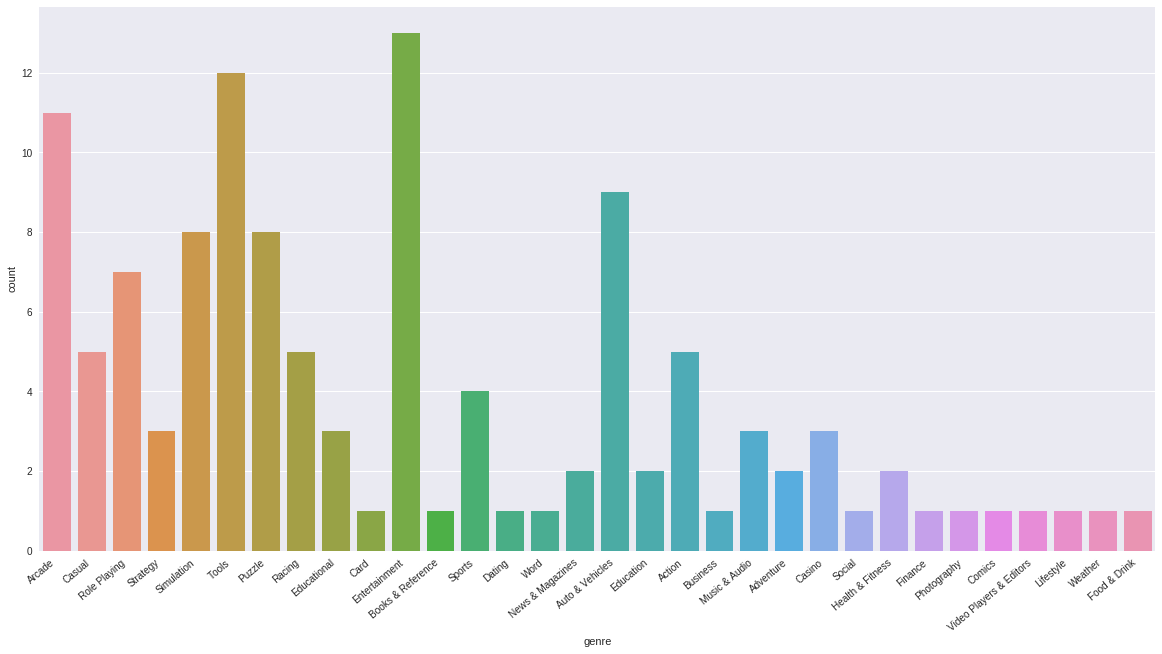

In [0]:
plt.figure(figsize = (20, 10))
g = sns.countplot(x = new_free_play['genre'])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.show()

Trend in New play store apps is skewed towards **Entertainment** apps. It is not a surprise that **tools** are more popular in android space than they are in IOS devices, because andriod being open source. 

We can not fairly compare the data between IOS apps and Android apps, because the data is designed differntly in these two app stores. If you look it up, There is no **Games** Category in Play store data, but there is one in IOS data. Also, Play store data has single genre distributions, where as app store data has a list of genre dedicated to one application.

(11, 44)
(8, 44)
(40, 44)
(11, 44)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


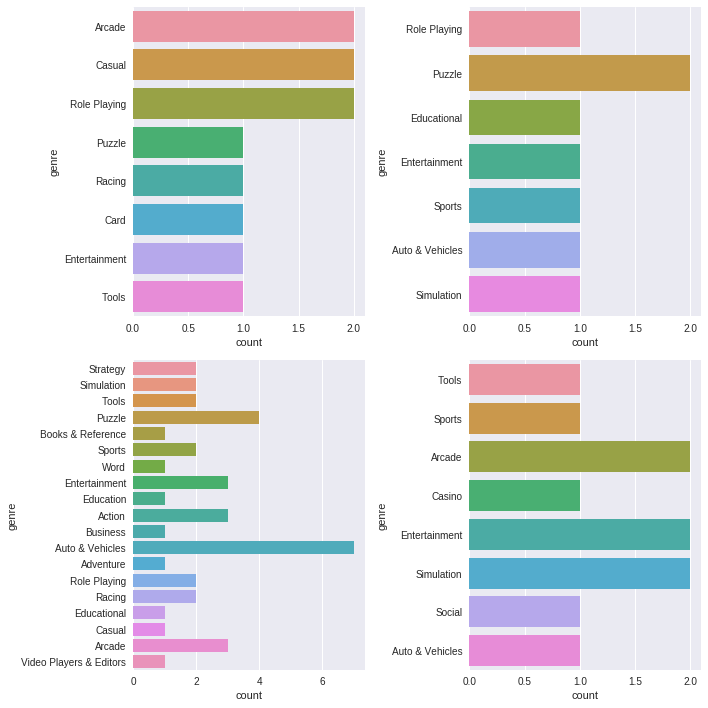

In [0]:
#Find apps with greater than 1000000 installs
new_free_play_min_installs_1000000 = new_free_play[new_free_play.minInstalls >= 1000000]
print(new_free_play_min_installs_1000000.shape)

#Find apps with greater than 500000 installs
new_free_play_min_installs_500000 = new_free_play[(new_free_play.minInstalls >= 500000) & (new_free_play.minInstalls < 1000000)]
print(new_free_play_min_installs_500000.shape)

#Find apps with greater than 100000 installs
new_free_play_min_installs_100000 = new_free_play[(new_free_play.minInstalls >= 100000) & (new_free_play.minInstalls < 500000)]
print(new_free_play_min_installs_100000.shape)

#Find apps with greater than 50000 installs
new_free_play_min_installs_50000 = new_free_play[(new_free_play.minInstalls >= 50000) & (new_free_play.minInstalls < 100000)]
print(new_free_play_min_installs_50000.shape)

#Plot the outcome
f, axes = plt.subplots(2,2, figsize= (10,10))
sns.countplot(y= new_free_play_min_installs_1000000['genre'], ax = axes[0,0])
sns.countplot(y= new_free_play_min_installs_500000['genre'],  ax = axes[0,1])
sns.countplot(y= new_free_play_min_installs_100000['genre'],  ax = axes[1,0])
sns.countplot(y= new_free_play_min_installs_50000['genre'],   ax = axes[1,1])

plt.tight_layout()
plt.show()

If we compare the plots of minInstalls values 1000000, 500000, 100000, 50000; then we can see that **Entertainment** and **Tools** are not poupular as they are with the overall data. So that we can make a conclusion that those two categories are popular in the minInstalls value less than 100000. 

We can also see that **auto and vehicles** apps are in the range of 50000 to 500000 installs. 

In [0]:
new_free_play[(new_free_play.scoreText < 4) & (new_free_play.minInstalls >= 50000)][['title','scoreText', "genre"]]

,title,scoreText,genre
19,Thrill: chat book with short stories to read,3.3,Books & Reference
22,Angry Birds Dream Blast,3.9,Puzzle
34,Miga Town: My Vacation,3.6,Education
49,Heroes of Warland - PvP Shooter Arena,3.7,Action
52,Operate Now: Animal Hospital,3.8,Simulation
55,Call of Duty Companion App,2.7,Tools
68,Truck Simulation 19,3.8,Simulation
98,Sticker maker,3.9,Tools
101,surviv.io - 2D Battle Royale,3.8,Action


There are only few apps which has **less than 4 score with more than 50000 installs.**

                        title         genre  scoreText  minInstalls
0               Fire Balls 3D        Arcade        4.5      5000000
1               Stickman Hook        Arcade        4.2      5000000
2            My Talking Tom 2        Casual        4.7     10000000
3  Assassin's Creed Rebellion  Role Playing        4.5      1000000
6                  Flip Lover    Simulation        4.3       100000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


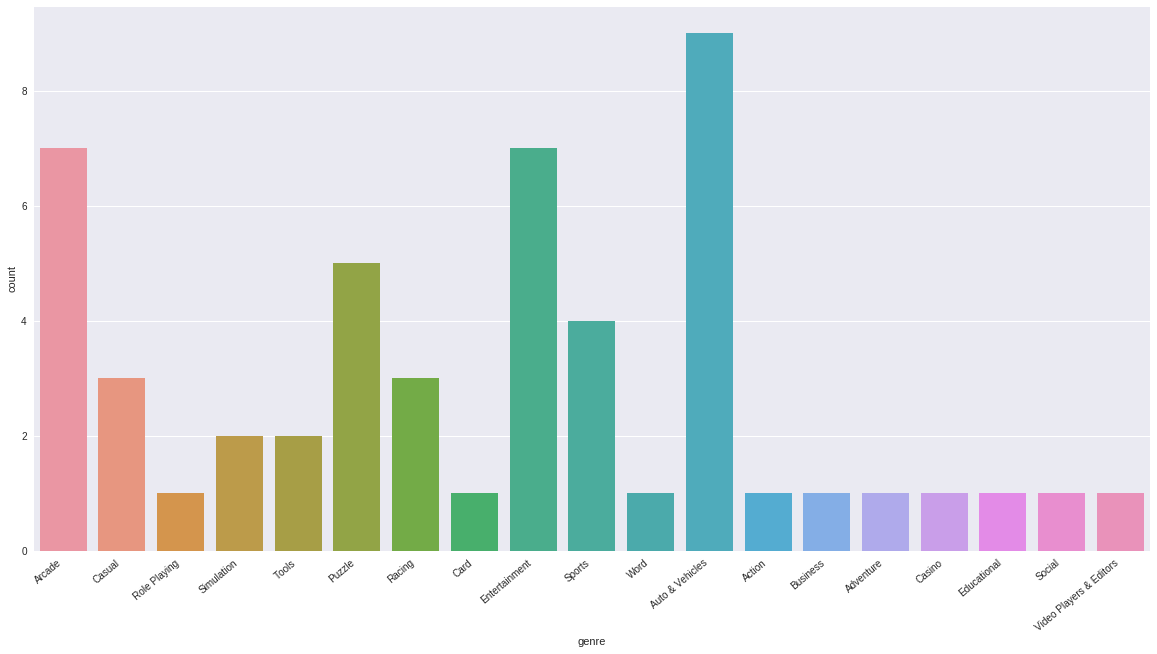

In [0]:
print(new_free_play[(new_free_play['adSupported']) & (new_free_play.minInstalls >= 50000) & (new_free_play.scoreText >= 4)][['title','genre','scoreText', 'minInstalls']].head())

plt.figure(figsize = (20, 10))
g = sns.countplot(x = new_free_play[(new_free_play['adSupported']) & (new_free_play.minInstalls >= 50000) & (new_free_play.scoreText >= 4)]['genre'])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.show()

There are 52 apps in the top 200 which supports ad, has more than 50000 installs and their score is 4 or more than 4. So, having advertisments in your app will not hurt your app. As expected, **auto & vehicles** and **entertainment** has the most apps in the category which allows ads, because Giving ads is one of getting money for entertainment industry, auto & vehicles attract customers with ads to increase sell.


# **New Paid Play Store Apps**

In [0]:
new_paid_play.columns

Index(['title', 'description', 'descriptionHTML', 'summary', 'installs',
       'minInstalls', 'score', 'scoreText', 'ratings', 'reviews', 'histogram',
       'price', 'free', 'currency', 'priceText', 'offersIAP', 'size',
       'androidVersion', 'androidVersionText', 'developer', 'developerId',
       'developerEmail', 'developerWebsite', 'developerAddress',
       'privacyPolicy', 'genre', 'genreId', 'familyGenre', 'familyGenreId',
       'icon', 'headerImage', 'screenshots', 'video', 'videoImage',
       'contentRating', 'contentRatingDescription', 'adSupported', 'released',
       'updated', 'version', 'recentChanges', 'comments', 'appId', 'url'],
      dtype='object')

In [0]:
new_paid_play.head()

,title,description,descriptionHTML,summary,installs,minInstalls,score,scoreText,ratings,reviews,...,contentRating,contentRatingDescription,adSupported,released,updated,version,recentChanges,comments,appId,url
0,Kingdom Rush Vengeance,Vez’nan the powerful almighty wizard has retur...,Vez’nan the powerful almighty wizard has retur...,The most acclaimed tower defense franchise is ...,"10,000+",10000,4.765751,4.8,8777,3803,...,Everyone 10+,"Fantasy Violence, Mild Blood",True,"Nov 21, 2018",1543438744000,1.2,Bug Fixes and Improvements,[],com.ironhidegames.android.kingdomrush4,https://play.google.com/store/apps/details?id=...
1,Grow Spaceship VIP - Galaxy Battle,■■■■■■■■■■■■■■■■ VIP ■■■■■■■■■■■■■■■■■■■■■\r\n...,■■■■■■■■■■■■■■■■ VIP ■■■■■■■■■■■■■■■■■■■■■<br>...,Build the best fleet by craft battleship and t...,"5,000+",5000,4.423729,4.4,118,25,...,Everyone 10+,"Fantasy Violence, Mild Blood",True,"Nov 13, 2018",1542103117000,3.8,NaN,[],com.pixelstar.GrowSpaceshipVIP,https://play.google.com/store/apps/details?id=...
2,Brick Breaker : Evolution RPG (VIP),▶▶▶ VIP Benefit ◀◀◀\r\n- 100 Magic Stones\r\n-...,▶▶▶ VIP Benefit ◀◀◀<br>- 100 Magic Stones<br>-...,The combination of composition and block break...,"5,000+",5000,4.389831,4.4,118,55,...,Everyone,NaN,True,"Nov 13, 2018",1543391727000,1.3,New launch!!,[],com.honeydew.vip.mercenary,https://play.google.com/store/apps/details?id=...
3,Lines Live Wallpaper,Lines Live Wallpaper\r\nGet moving lines on yo...,<strong>Lines</strong> Live Wallpaper<br><em>G...,Get moving Lines on your screen.,"1,000+",1000,4.925926,4.9,27,9,...,Everyone,NaN,False,"Nov 21, 2018",1542810010000,1.0,First release.,[],cdev.lines,https://play.google.com/store/apps/details?id=...
4,Simple Calendar Pro,A simple calendar with optional CalDAV synchro...,A simple calendar with optional CalDAV synchro...,"A simple calendar with events, customizable wi...","10,000+",10000,4.424837,4.4,459,230,...,Everyone,NaN,False,"Nov 16, 2018",1542560038000,6.0.1,Fixed some crashes and UX glitches,[],com.simplemobiletools.calendar.pro,https://play.google.com/store/apps/details?id=...


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


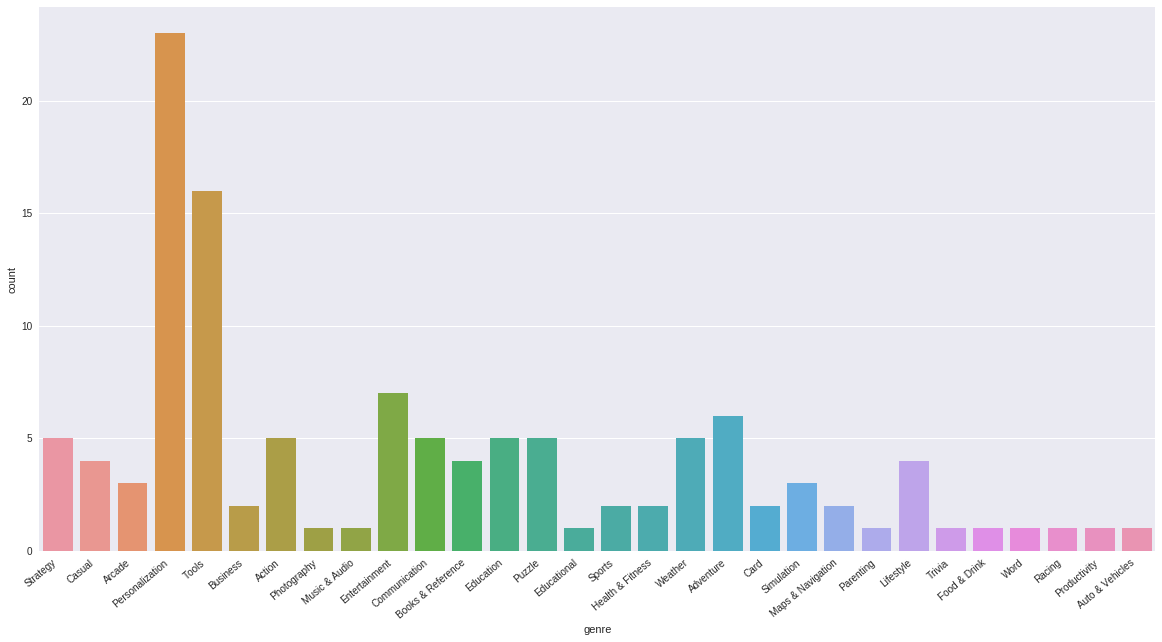

In [0]:
plt.figure(figsize = (20, 10))
g = sns.countplot(x = new_paid_play['genre'])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.show()

Trend in New play store apps is towards **Personaliztion** apps. It is not a surprise that **tools** are more popular in android space than they are in IOS devices, because andriod being open source. 

Very much similar to the free apps we can not fairly compare the data between IOS apps and Android apps, because the data is designed differntly in these two app stores. If you look it up, There is no **Games** Category in Play store data, but there is one in IOS data. Also, Play store data has single genre distributions, where as app store data has a list of genre dedicated to one application.

(11, 44)
(5, 44)
(14, 44)
(9, 44)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


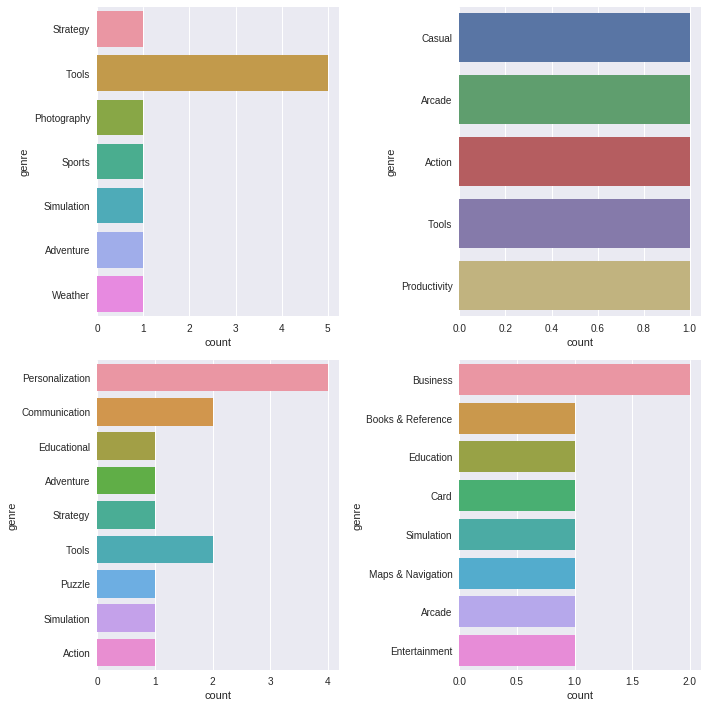

In [0]:
#Find apps with greater than 10000 installs
new_paid_play_min_installs_10000 = new_paid_play[new_paid_play.minInstalls >= 10000]
print(new_paid_play_min_installs_10000.shape)

#Find apps with greater than 5000 installs
new_paid_play_min_installs_5000 = new_paid_play[(new_paid_play.minInstalls >= 5000) & (new_paid_play.minInstalls < 10000)]
print(new_paid_play_min_installs_5000.shape)

#Find apps with greater than 1000 installs
new_paid_play_min_installs_1000 = new_paid_play[(new_paid_play.minInstalls >= 1000) & (new_paid_play.minInstalls < 5000)]
print(new_paid_play_min_installs_1000.shape)

#Find apps with greater than 500 installs
new_paid_play_min_installs_500 = new_paid_play[(new_paid_play.minInstalls >= 500) & (new_paid_play.minInstalls < 1000)]
print(new_paid_play_min_installs_500.shape)

#Plot the outcome
f, axes = plt.subplots(2,2, figsize= (10,10))
sns.countplot(y= new_paid_play_min_installs_1000000['genre'], ax = axes[0,0])
sns.countplot(y= new_paid_play_min_installs_500000['genre'],  ax = axes[0,1])
sns.countplot(y= new_paid_play_min_installs_100000['genre'],  ax = axes[1,0])
sns.countplot(y= new_paid_play_min_installs_50000['genre'],   ax = axes[1,1])

plt.tight_layout()
plt.show()

If we compare the plots of minInstalls values 10000, 5000, 1000, 500; then we can see that **Tools** are the most poupular for the downloads above 10000. Also another thing to notice is that the minInstalls for Paid apps is much lesser than that of the free apps or of that of the IOS apps. Most new paid apps have minInstalls lesser than 500.

We can also see that **Personalization** is the most popular app supporting our overall data graph.

In [0]:
new_paid_play[(new_paid_play.scoreText < 4) & (new_paid_play.minInstalls >= 500)][['title','scoreText', "genre"]]

,title,scoreText,genre
5,Package Disabler Pro+ (Samsung),3.7,Business
16,Football Manager 2019 Mobile,3.7,Sports
19,Package Disabler Pro ( Owner APP) All Android,2.6,Business
55,Football Manager 2019 Touch,3.6,Simulation
84,Perfect Icon Pack,3.0,Personalization


There are only **5** apps which has **less than 4 score with more than 500 installs.**

In [0]:
new_paid_play[(new_paid_play.minInstalls <= 500)][['title','scoreText', "genre"]]

,title,scoreText,genre
5,Package Disabler Pro+ (Samsung),3.7,Business
8,999FM,4.0,Music & Audio
9,ReindeerCam 2018,4.7,Entertainment
11,Sibley Birds 2nd Edition,4.3,Books & Reference
12,AudioBrain Kid,4.5,Education
13,Where Shadows Slumber,4.9,Puzzle
15,SFX Phone Cleaner Pro,4.9,Tools
17,Status Generator for IMs,5.0,Personalization
18,BODIED by J - Health & Fitness,5.0,Health & Fitness
19,Package Disabler Pro ( Owner APP) All Android,2.6,Business


There are **90** apps with less then **500 installs**.``

                                           title          genre  scoreText  \
0                         Kingdom Rush Vengeance       Strategy        4.8   
1             Grow Spaceship VIP - Galaxy Battle         Casual        4.4   
2            Brick Breaker : Evolution RPG (VIP)         Arcade        4.4   
6           Legend Heroes: Epic Battle - Premium         Action        4.4   
10  Bloobib Sticker For WhatsApp (Cute Stickers)  Communication        4.3   

    minInstalls  
0         10000  
1          5000  
2          5000  
6          5000  
10         1000  


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


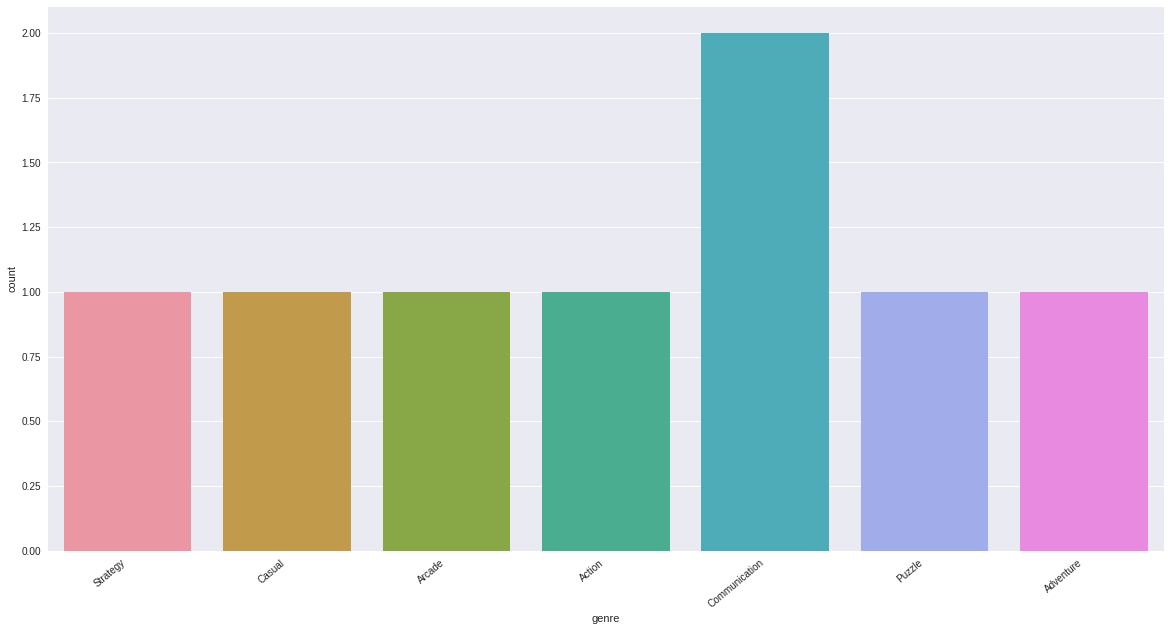

In [0]:
print(new_paid_play[(new_paid_play['adSupported']) & (new_paid_play.minInstalls >= 500) & (new_paid_play.scoreText >= 4)][['title','genre','scoreText','minInstalls']].head())

plt.figure(figsize = (20, 10))
g = sns.countplot(x = new_paid_play[(new_paid_play['adSupported']) & (new_paid_play.minInstalls >= 500) & (new_paid_play.scoreText >= 4)]['genre'])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.show()

There are **8** which supports ad, has more than 500 installs and their score is 4 or more than 4. So, having advertisments does have an effect as people expect **no ads** when they are paying for the apps. There is not much data from which we can derive anything else, so we can conclude that people don't like ads when they pay for the app as compared to the free apps.


# Conclusion

The next big thing is always coming in this industry. Tech moves at warp speed, but offers much more than innovation and excitement. It can solve big problems and change everyday lives on a grand scale and you know what to focus on now. As from the data visualized we can see what people like and differentiate the taste between Android users an iOS users.